# Content Moderation System | Text Moderation | Transformer BERT | ITsolera PVT | Project 1 | Classifying Text as Positve (0) or Negative (1)

In [ ]:
import pandas as pd

# Load the preprocessed data with error handling
file_path = '/content/preprocessed_data.csv'
data = pd.read_csv(file_path, on_bad_lines='skip')

data.head()

,text,annotation,input_ids,attention_mask
0,One of the best game music soundtracks - for a...,0,"[101, 2028, 1997, 1996, 2190, 2208, 2189, 2424...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
1,Batteries died within a year ...I bought this ...,1,"[101, 10274, 2351, 2306, 1037, 2095, 1012, 101...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
2,"works fine, but Maha Energy is betterCheck out...",0,"[101, 2573, 2986, 1010, 2021, 24404, 2943, 200...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
3,Great for the non-audiophileReviewed quite a b...,0,"[101, 2307, 2005, 1996, 2512, 1011, 5746, 2486...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
4,DVD Player crapped out after one yearI also be...,1,"[101, 4966, 2447, 10231, 5669, 2041, 2044, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Tokenize the data
def tokenize_text(text):
    return tokenizer(text, padding='max_length', max_length=128, truncation=True, return_tensors='tf')

# Apply the tokenizer to your text data
tokenized_data = data['text'].apply(tokenize_text)

In [ ]:
# Convert tokenized data to tensors
input_ids = tf.convert_to_tensor([x['input_ids'][0] for x in tokenized_data])
attention_masks = tf.convert_to_tensor([x['attention_mask'][0] for x in tokenized_data])
labels = tf.convert_to_tensor(data['annotation'].values)

# Display the first few rows of the data
print(data.head())

                                                text  annotation  \
0  One of the best game music soundtracks - for a...           0   
1  Batteries died within a year ...I bought this ...           1   
2  works fine, but Maha Energy is betterCheck out...           0   
3  Great for the non-audiophileReviewed quite a b...           0   
4  DVD Player crapped out after one yearI also be...           1   

                                           input_ids  \
0  [101, 2028, 1997, 1996, 2190, 2208, 2189, 2424...   
1  [101, 10274, 2351, 2306, 1037, 2095, 1012, 101...   
2  [101, 2573, 2986, 1010, 2021, 24404, 2943, 200...   
3  [101, 2307, 2005, 1996, 2512, 1011, 5746, 2486...   
4  [101, 4966, 2447, 10231, 5669, 2041, 2044, 202...   

                   attention_mask  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  


In [ ]:
# Split the data into training and validation sets using TensorFlow
dataset_size = len(input_ids)
indices = tf.range(start=0, limit=dataset_size, dtype=tf.int32)
indices = tf.random.shuffle(indices)

train_size = int(0.9 * dataset_size)
train_indices = indices[:train_size]
val_indices = indices[train_size:]

train_inputs = tf.gather(input_ids, train_indices)
train_masks = tf.gather(attention_masks, train_indices)
train_labels = tf.gather(labels, train_indices)

val_inputs = tf.gather(input_ids, val_indices)
val_masks = tf.gather(attention_masks, val_indices)
val_labels = tf.gather(labels, val_indices)

In [ ]:
# Load BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
# Display model summary
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
 dropout_75 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 108311810 (413.18 MB)
Trainable params: 108311810 (413.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(
    [train_inputs, train_masks],
    train_labels,
    validation_data=([val_inputs, val_masks], val_labels),
    epochs=3,
    batch_size=16
)

Epoch 1/3
3938/3938 [==============================] - 1770s 441ms/step - loss: 0.1996 - accuracy: 0.9220 - val_loss: 0.1614 - val_accuracy: 0.9379
Epoch 2/3
3938/3938 [==============================] - 1733s 440ms/step - loss: 0.1084 - accuracy: 0.9627 - val_loss: 0.1634 - val_accuracy: 0.9403
Epoch 3/3
3938/3938 [==============================] - 1728s 439ms/step - loss: 0.0630 - accuracy: 0.9797 - val_loss: 0.1751 - val_accuracy: 0.9364


In [ ]:
# Save the model and tokenizer
model.save_pretrained('text_moderation_model')

In [ ]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate([val_inputs, val_masks], val_labels)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

219/219 [==============================] - 64s 290ms/step - loss: 0.1751 - accuracy: 0.9364
Validation Loss: 0.17511479556560516
Validation Accuracy: 0.9364285469055176


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
# Predict on the validation set
val_predictions = model.predict([val_inputs, val_masks])
val_pred_labels = np.argmax(val_predictions.logits, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(val_labels, val_pred_labels))

219/219 [==============================] - 71s 290ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3627
           1       0.92      0.95      0.93      3373

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000



In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(val_labels, val_pred_labels)
recall = recall_score(val_labels, val_pred_labels)
f1 = f1_score(val_labels, val_pred_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.923121387283237
Recall: 0.9469315149718351
F1 Score: 0.9348748719449729


Confusion Matrix:
[[3361  266]
 [ 179 3194]]


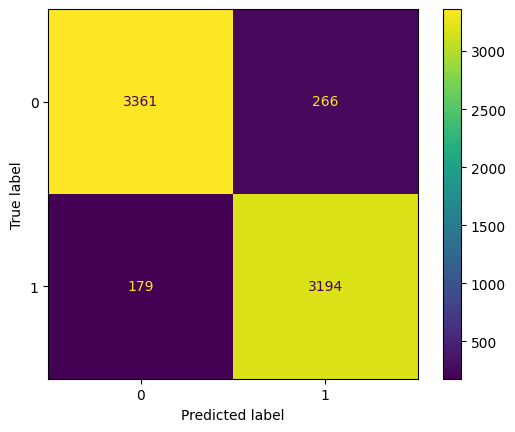

In [ ]:
# Confusion matrix
cm = confusion_matrix(val_labels, val_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()